<a href="https://colab.research.google.com/github/robertoricci/Analise-Financeira/blob/main/dre_py_am.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de demonstrativos financeiros

Quando analisamos a demonstração de resultados de uma empresa listada na bolsa de valores, frequentemente recorremos a ferramentas convencionais, que embora sejam úteis, muitas vezes carecem de automação. É aqui que entra o Python. Neste post, exploramos o poder do Python para automatizar o processo de coleta, tratamento e análise dos dados da Demonstração do Resultado do Exercício (DRE) da Eletrobras, utilizando dados fornecidos pela CVM (Comissão de Valores Mobiliários).

Análise de demonstrações financeiras

A Análise de demonstrações financeiras permite que se extraia, dos demonstrativos contábeis apurados e divulgados por uma empresa, informações úteis sobre o seu desempenho econômico- financeiro, podendo atender aos objetivos de análise dos investidores, credores, concorrentes, empregados, governo etc.

Insumos

Relatórios contábeis elaborados periodicamente pelas empresas.

Lei das Sociedades por Ações:

Balanço Patrimonial;
Demonstração do Resultado do Exercício;
Demonstração dos Fluxos de Caixa;
Demonstração das Mutações do Patrimônio Líquido;
Demonstração do Valor Adicionado

Uma companhia de capital aberto deve apurar as seguintes demonstrações em atendimento às exigências da Comissão de Valores Mobiliários (CVM), B3 e seus acionistas:

Demonstrações Financeiras Padronizadas (DFP) – Este documento é composto por todos os demonstrativos financeiros referentes ao exercício social encerrado, e deve ser encaminhado ao final de cada trimestre de cada ano à CVM e à B3.

Acesso: https://dados.cvm.gov.br/dataset/cia_aberta-doc-dfp

Informações e Resultados Trimestrais (ITR) – São elaborados e enviados por todas as companhias listadas em Bolsa de Valores para a CVM e B3 todo trimestre. A ITR tem por finalidade permitir que o investidor acompanhe o desempenho da empresa no trimestre.

Acesso: https://dados.cvm.gov.br/dataset/cia_aberta-doc-itr

Estudo de Caso: DRE da Eletrobras

Para obter o código e o tutorial deste exercício faça parte do Clube AM e receba toda semana os códigos em R/Python, vídeos, tutoriais e suporte completo para dúvidas.

Aprenda a coletar, processar e analisar dados do mercado financeiro no curso de Análise de Demonstrativos Financeiros usando o Python.

Podemos utilizar como exemplo a Demonstração do Resultado do Exercício da Eletrobras, através de um processo simples por meio da linguagem de programação Python:

Coleta de dados da DFP através do site https://dados.cvm.gov.br/dataset/cia_aberta-doc-dfp
Tratamento de dados, retirando colunas e linhas desnecessárias, e manipulando a formatação da melhor forma possível para comunicar os resultados;
Apresentação dos resultados.

Ao final, podemos obter tabelas e gráficos diversos, para melhor representar a análise que desejamos criar. Abaixo, como exemplo, criamos um gráfico que representa o Lucro/Prejuízo, Receita e Custos da DRE consolidada da Eletrobras na periodicidade anual de 2010 até 2019 (eixo y é representado na casa dos milhões, com 1e7 sendo 10 milhões).

## Coletando e Analisando dados da DRE com o Python

In [ ]:
# Carrega as bibliotecas
!pip install wget
import wget # biblioteca para realizar o download de sites
import pandas as pd # biblioteca para manipulação de dados e data frames
from zipfile import ZipFile # biblioteca para extrair arquivo zipados
import seaborn as sns
sns.set()

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=a9ede6c9b11d4b486e584436514d0ff4d7d44d13e807859cbd105e5ba8576931
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [ ]:
# Define a url dos dados da DFP
url_dfp = "https://dados.cvm.gov.br/dados/CIA_ABERTA/DOC/DFP/DADOS/"

# Cria uma lista vazia para inserir os arquivos
arquivo_zipado = []

data_inicial = 2010

data_final = 2020

# Define os range de datas
for ano in range(data_inicial, data_final + 1):
# Cria os nomes dos arquivos de acordo com o ano
  arquivo_zipado.append(f'dfp_cia_aberta_{ano}.zip')

In [ ]:
arquivo_zipado

['dfp_cia_aberta_2010.zip',
 'dfp_cia_aberta_2011.zip',
 'dfp_cia_aberta_2012.zip',
 'dfp_cia_aberta_2013.zip',
 'dfp_cia_aberta_2014.zip',
 'dfp_cia_aberta_2015.zip',
 'dfp_cia_aberta_2016.zip',
 'dfp_cia_aberta_2017.zip',
 'dfp_cia_aberta_2018.zip',
 'dfp_cia_aberta_2019.zip',
 'dfp_cia_aberta_2020.zip']

In [ ]:
# Realiza os downloads de acordo com a url base
for arquivos in arquivo_zipado:
  wget.download(url_dfp+arquivos)

In [ ]:
# Extrai os arquivos zipados
for arquivos in arquivo_zipado:
   ZipFile(arquivos, 'r').extractall('DFP')

In [ ]:
demonstrativos = ['DRE_con']

for demons in demonstrativos:
  # Cria DF vazio para colocar os arquivos
  arquivo_dre = pd.DataFrame()
  # Realiza a concatenação dos arquivos
  for ano in range(data_inicial, data_final):
      arquivo_dre = pd.concat([arquivo_dre, pd.read_csv(f'DFP/dfp_cia_aberta_{demons}_{ano}.csv', sep = ';', decimal = ',', encoding = 'ISO-8859-1')]) # Concatena os arquivos lidos em insere no df vazio
  arquivo_dre.to_csv(f'dfp_cia_aberta_{demons}_2010-2020', index = False) # transforma o arquivo do df concatenado em um arquivo csv

In [ ]:
# Realiza a leitura do arquivo concatenado
dre = pd.read_csv(f'dfp_cia_aberta_DRE_con_2010-2020')

In [ ]:
dre

,CNPJ_CIA,DT_REFER,VERSAO,DENOM_CIA,CD_CVM,GRUPO_DFP,MOEDA,ESCALA_MOEDA,ORDEM_EXERC,DT_INI_EXERC,DT_FIM_EXERC,CD_CONTA,DS_CONTA,VL_CONTA,ST_CONTA_FIXA
0,00.000.000/0001-91,2010-12-31,3,BCO BRASIL S.A.,1023,DF Consolidado - Demonstração do Resultado,REAL,MIL,PENÚLTIMO,2009-01-01,2009-12-31,3.01,Receitas da Intermediação Financeira,6.760851e+07,S
1,00.000.000/0001-91,2010-12-31,3,BCO BRASIL S.A.,1023,DF Consolidado - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2010-01-01,2010-12-31,3.01,Receitas da Intermediação Financeira,8.514321e+07,S
2,00.000.000/0001-91,2010-12-31,3,BCO BRASIL S.A.,1023,DF Consolidado - Demonstração do Resultado,REAL,MIL,PENÚLTIMO,2009-01-01,2009-12-31,3.01.01,Receita de Juros,6.760851e+07,S
3,00.000.000/0001-91,2010-12-31,3,BCO BRASIL S.A.,1023,DF Consolidado - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2010-01-01,2010-12-31,3.01.01,Receita de Juros,8.514321e+07,S
4,00.000.000/0001-91,2010-12-31,3,BCO BRASIL S.A.,1023,DF Consolidado - Demonstração do Resultado,REAL,MIL,PENÚLTIMO,2009-01-01,2009-12-31,3.02,Despesas da Intermediação Financeira,-3.930264e+07,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255035,97.837.181/0001-47,2019-12-31,1,DEXCO S.A.,21091,DF Consolidado - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2019-01-01,2019-12-31,3.99.01.01,ON,5.881000e-01,N
255036,97.837.181/0001-47,2019-12-31,1,DEXCO S.A.,21091,DF Consolidado - Demonstração do Resultado,REAL,MIL,PENÚLTIMO,2018-01-01,2018-12-31,3.99.02,Lucro Diluído por Ação,0.000000e+00,N
255037,97.837.181/0001-47,2019-12-31,1,DEXCO S.A.,21091,DF Consolidado - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2019-01-01,2019-12-31,3.99.02,Lucro Diluído por Ação,0.000000e+00,N
255038,97.837.181/0001-47,2019-12-31,1,DEXCO S.A.,21091,DF Consolidado - Demonstração do Resultado,REAL,MIL,PENÚLTIMO,2018-01-01,2018-12-31,3.99.02.01,ON,6.206000e-01,N


In [ ]:
# DRE
## Filtra as contas, a empresa e a ordem do exercício
new_dre  = dre[dre.CD_CONTA.isin(['3.11', '3.01', '3.02']) & (dre.CD_CVM == 2437) & (dre.ORDEM_EXERC == 'ÚLTIMO')]

# Tratamento dos dados para a visualização
sub_dre_pivot = new_dre[['DT_REFER', 'DS_CONTA', 'VL_CONTA']].pivot_table(index = 'DT_REFER', columns = 'DS_CONTA', values = 'VL_CONTA')

sub_dre_pivot

DS_CONTA,Custo dos Bens e/ou Serviços Vendidos,Lucro/Prejuízo Consolidado do Período,Receita de Venda de Bens e/ou Serviços
DT_REFER,,,
2010-12-31,-4265905.0,2552985.0,29814652.0
2011-12-31,-4715747.0,3762019.0,33061356.0
2012-12-31,-5474384.0,-6925652.0,39538861.0
2013-12-31,-4350755.0,-6291375.0,28186399.0
2014-12-31,-16327359.0,-2962502.0,30244854.0
2015-12-31,-16991559.0,-14953658.0,32588838.0
2016-12-31,-16210934.0,3513276.0,60748853.0
2017-12-31,-15373638.0,-1725691.0,37876024.0
2018-12-31,-5537063.0,13347577.0,24975747.0


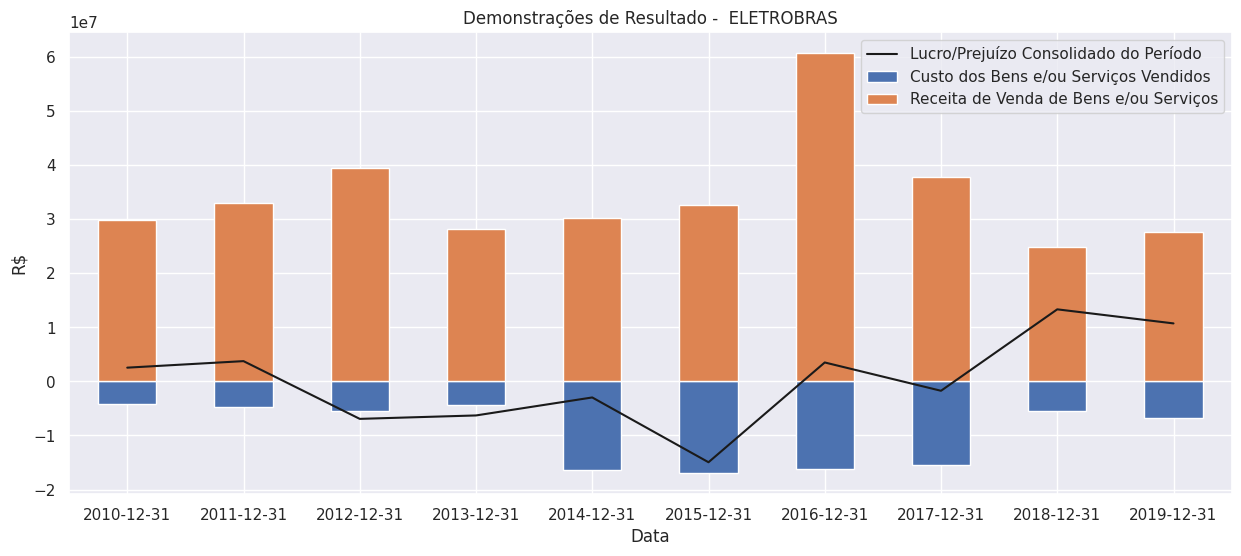

In [ ]:
# Cria o gráfico da DRE
ax = sub_dre_pivot.drop('Lucro/Prejuízo Consolidado do Período', axis = 1).plot(kind = 'bar', stacked = True) # retira a coluna de lucro/prejuízo e plota o gráfico de barras empilhados
g = sub_dre_pivot[['Lucro/Prejuízo Consolidado do Período']].plot(ax = ax, color = 'k', figsize = (15, 6)) # usa somente a coluna de lucro/prejuiízo e plota

g.set(xlabel = 'Data', ylabel = 'R$', title = 'Demonstrações de Resultado -  ELETROBRAS')
g.legend(loc = 'best')